# Kaggle Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
 # Выбор данных из большого объема данных
from DatasetHandler import *

In [3]:
data = get_small(path="/Users/evgenii/DDoS Dataset/final_dataset.csv",size=110000,random_state=42)

In [4]:
data.to_csv('Datasets/Train.csv')

In [5]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.28-52.14.136.135-80-64777-6,52.14.136.135,64777,172.31.69.28,80,6,22/02/2018 12:24:20 AM,2028,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
1,172.31.69.28-18.219.9.1-80-59013-6,172.31.69.28,80,18.219.9.1,59013,6,21/02/2018 11:49:38 PM,1763,4,3,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
2,172.31.65.29-54.246.237.176-50360-443-6,172.31.65.29,50360,54.246.237.176,443,6,20/02/2018 10:57:54,119961344,14,19,...,20,155920.666667,173356.930648,509784.0,85086.0,1.983764e+07,377288.595924,19999747.0,19068180.0,Benign
3,172.31.69.25-18.219.193.20-80-59992-6,18.219.193.20,59992,172.31.69.25,80,6,16/02/2018 11:16:37 PM,1101,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
4,172.31.0.2-172.31.64.97-53-54899-17,172.31.64.97,54899,172.31.0.2,53,17,20/02/2018 03:37:08,37121,2,2,...,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign


## Preprocessing

In [6]:
# Удаляем стобцы, в которых все значения одинаковые
data = unique(data)
data

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.28-52.14.136.135-80-64777-6,52.14.136.135,64777,172.31.69.28,80,6,22/02/2018 12:24:20 AM,2028,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
1,172.31.69.28-18.219.9.1-80-59013-6,172.31.69.28,80,18.219.9.1,59013,6,21/02/2018 11:49:38 PM,1763,4,3,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
2,172.31.65.29-54.246.237.176-50360-443-6,172.31.65.29,50360,54.246.237.176,443,6,20/02/2018 10:57:54,119961344,14,19,...,20,155920.666667,173356.930648,509784.0,85086.0,1.983764e+07,377288.595924,19999747.0,19068180.0,Benign
3,172.31.69.25-18.219.193.20-80-59992-6,18.219.193.20,59992,172.31.69.25,80,6,16/02/2018 11:16:37 PM,1101,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
4,172.31.0.2-172.31.64.97-53-54899-17,172.31.64.97,54899,172.31.0.2,53,17,20/02/2018 03:37:08,37121,2,2,...,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,172.31.69.25-18.219.193.20-80-52838-6,172.31.69.25,80,18.219.193.20,52838,6,16/02/2018 11:20:32 PM,4308077,4,4,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
219996,169.254.169.254-172.31.67.78-80-52184-6,172.31.67.78,52184,169.254.169.254,80,6,20/02/2018 01:20:17,85,2,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
219997,172.31.69.25-18.219.193.20-80-33674-6,172.31.69.25,80,18.219.193.20,33674,6,16/02/2018 11:25:10 PM,4407694,4,4,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
219998,172.31.69.25-18.219.193.20-80-45894-6,18.219.193.20,45894,172.31.69.25,80,6,16/02/2018 11:20:08 PM,400,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 76 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            220000 non-null  object 
 1   Src IP             220000 non-null  object 
 2   Src Port           220000 non-null  int64  
 3   Dst IP             220000 non-null  object 
 4   Dst Port           220000 non-null  int64  
 5   Protocol           220000 non-null  int64  
 6   Timestamp          220000 non-null  object 
 7   Flow Duration      220000 non-null  int64  
 8   Tot Fwd Pkts       220000 non-null  int64  
 9   Tot Bwd Pkts       220000 non-null  int64  
 10  TotLen Fwd Pkts    220000 non-null  float64
 11  TotLen Bwd Pkts    220000 non-null  float64
 12  Fwd Pkt Len Max    220000 non-null  float64
 13  Fwd Pkt Len Min    220000 non-null  float64
 14  Fwd Pkt Len Mean   220000 non-null  float64
 15  Fwd Pkt Len Std    220000 non-null  float64
 16  Bw

### Correlations

In [8]:
features = data.columns.to_list()
target = features.pop()

In [9]:
X = data.loc[:,features]
y = data.loc[:,target]

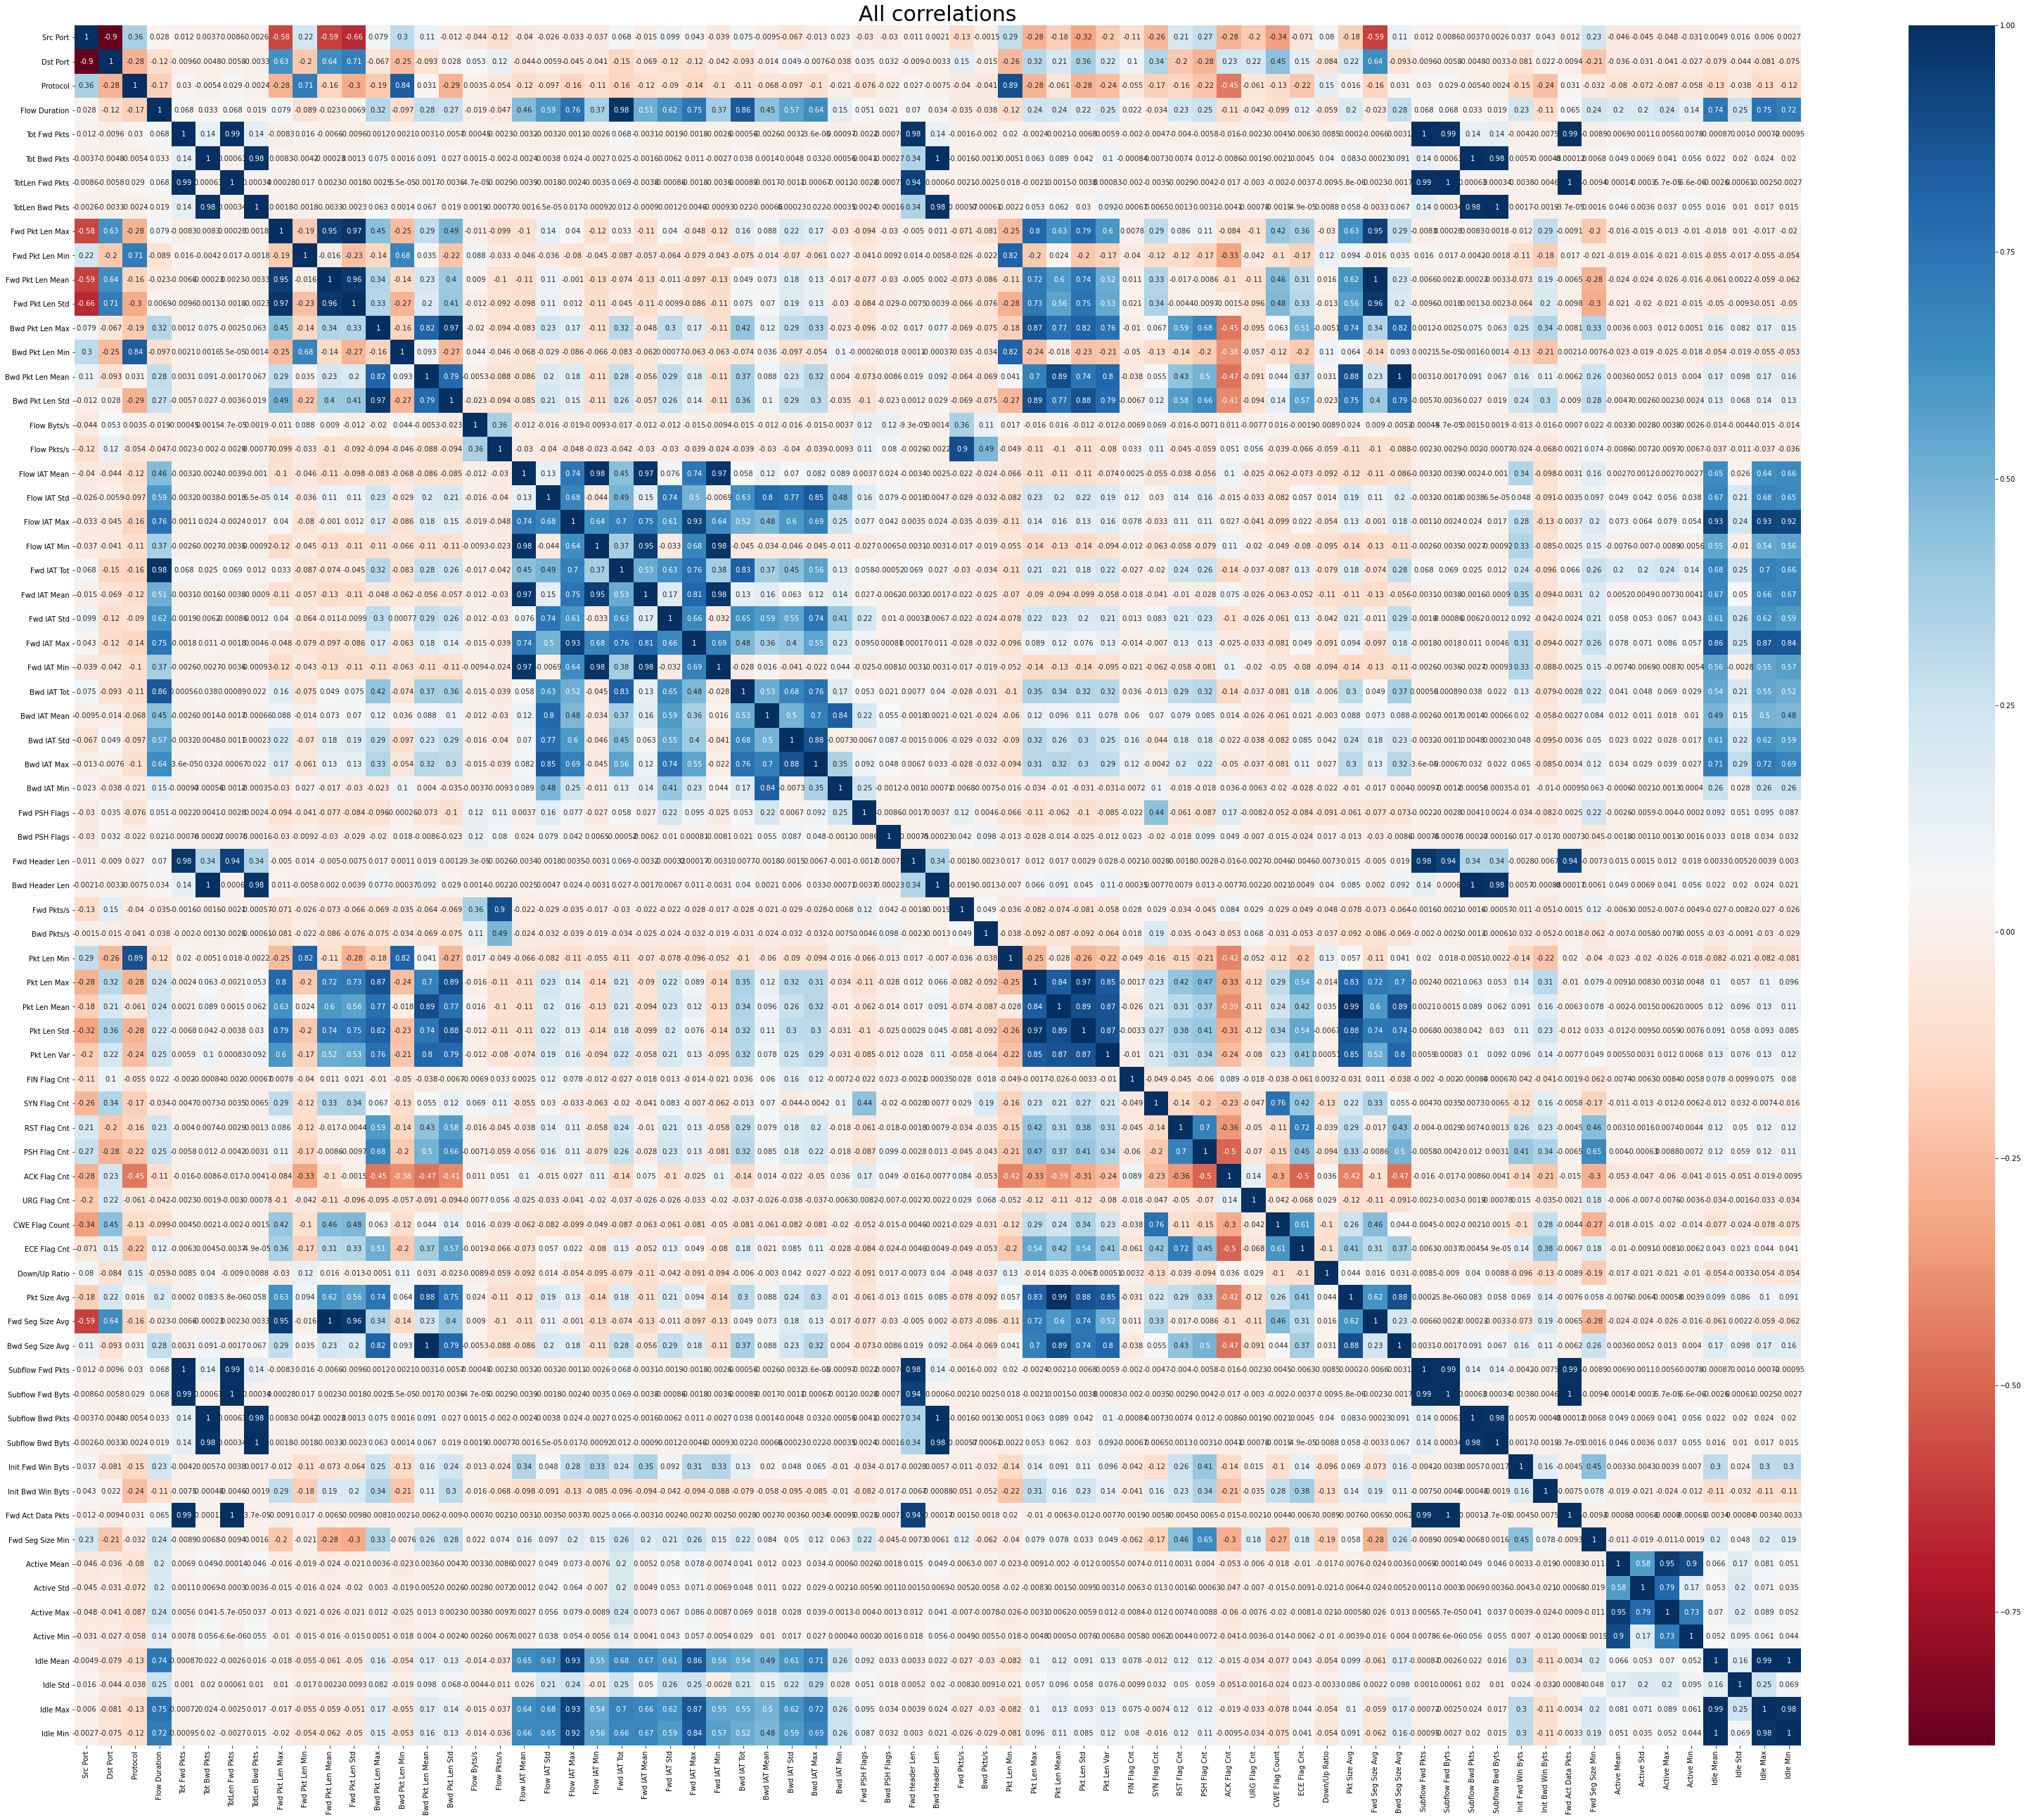

In [10]:
cormap(X,"All correlations")

In [11]:
#Удалим коррелирующие признаки при помощи фреймворка FeatureSelector
from feature_selector import FeatureSelector

In [12]:
fs = FeatureSelector(data = X, labels = y)
fs.identify_collinear(correlation_threshold = 0.80)

37 features with a correlation magnitude greater than 0.80.



In [13]:
# список признаков для удаления
collinear_features = fs.ops['collinear']
X = X.drop(collinear_features,axis=1)
X.head()

,Flow ID,Src IP,Src Port,Dst IP,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,...,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Idle Std
0,172.31.69.28-52.14.136.135-80-64777-6,52.14.136.135,64777,172.31.69.28,6,22/02/2018 12:24:20 AM,2028,1,1,0.0,...,0,0,0,1.0,-1,32738,0,0.000000,0.000000,0.000000
1,172.31.69.28-18.219.9.1-80-59013-6,172.31.69.28,80,18.219.9.1,6,21/02/2018 11:49:38 PM,1763,4,3,935.0,...,0,1,1,0.0,-1,32768,0,0.000000,0.000000,0.000000
2,172.31.65.29-54.246.237.176-50360-443-6,172.31.65.29,50360,54.246.237.176,6,20/02/2018 10:57:54,119961344,14,19,555.0,...,0,0,0,1.0,8192,118,20,155920.666667,173356.930648,377288.595924
3,172.31.69.25-18.219.193.20-80-59992-6,18.219.193.20,59992,172.31.69.25,6,16/02/2018 11:16:37 PM,1101,1,1,0.0,...,0,0,0,1.0,-1,225,0,0.000000,0.000000,0.000000
4,172.31.0.2-172.31.64.97-53-54899-17,172.31.64.97,54899,172.31.0.2,17,20/02/2018 03:37:08,37121,2,2,36.0,...,0,0,0,1.0,-1,-1,8,0.000000,0.000000,0.000000


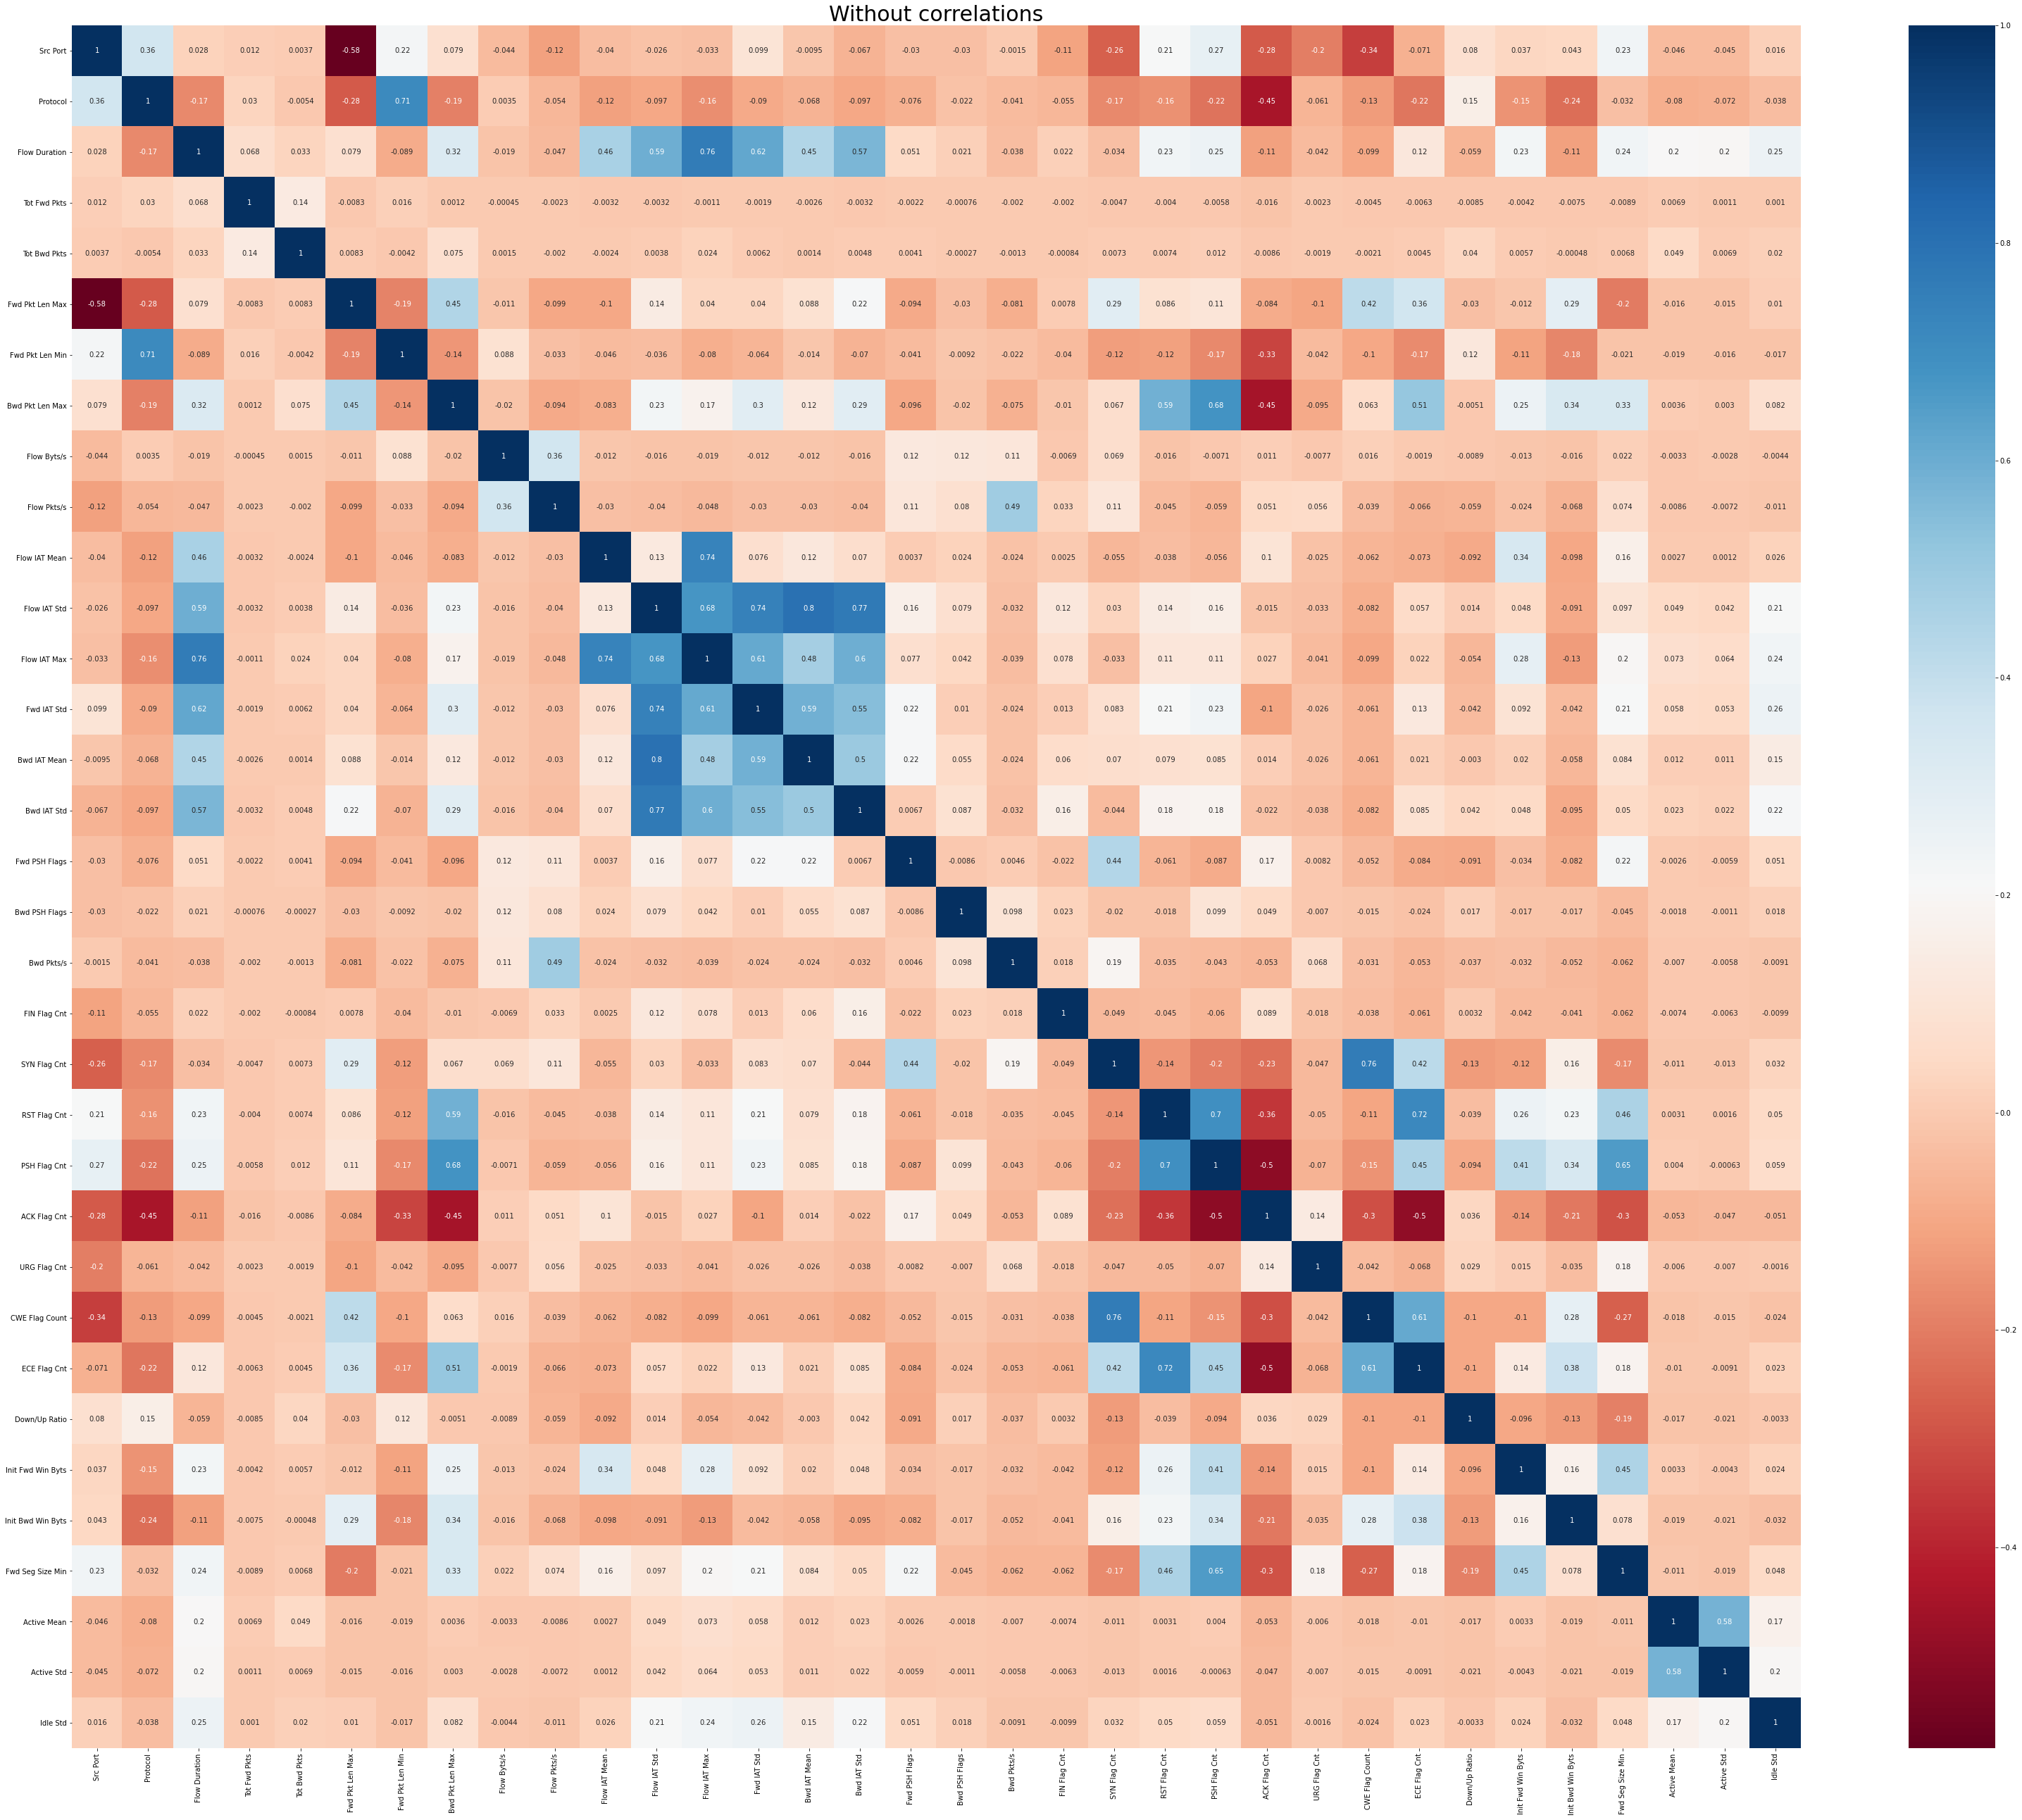

In [14]:
cormap(X,"Without correlations")

In [15]:
y =y.replace("ddos",1).replace("Benign",0)
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Label, dtype: int64

In [16]:
df_data = get_small(path="/Users/evgenii/DDoS Dataset/final_dataset.csv",size=200000,random_state=42)


In [17]:
df_data.to_csv("Datasets/Test.csv")
df_data = unique(df_data)
X_d = df_data.loc[:,features]
y_d = df_data.loc[:,target]
X_d = X_d.drop(collinear_features,axis=1)
y_d =y_d.replace("ddos",1).replace("Benign",0)

In [18]:
X_not = X
X_not_d = X_d

## CatBoost

### With all categorial feature

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_data = Pool(X_train,y_train,cat_features=[0,1,3,5])
test_data = Pool(X_test,y_test,cat_features=[0,1,3,5])

In [21]:
cat_all_model = CatBoostClassifier(iterations=75,
                           depth=3,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           verbose=False)

In [22]:
cat_all_model.fit(train_data)

Метрики для малой тестовой выборки

In [23]:
roc_auc_score(y_test, cat_all_model.predict_proba(X_test)[:,1])

1.0

In [24]:
accuracy_score(y_test, cat_all_model.predict(X_test))

0.9999090909090909

Метрики для большой тестовой выборки

In [25]:
roc_auc_score(y_d, cat_all_model.predict_proba(X_d)[:,1])

0.9999999991249999

In [26]:
accuracy_score(y_d, cat_all_model.predict(X_d))

0.99994

In [27]:
import shap
shap.initjs()

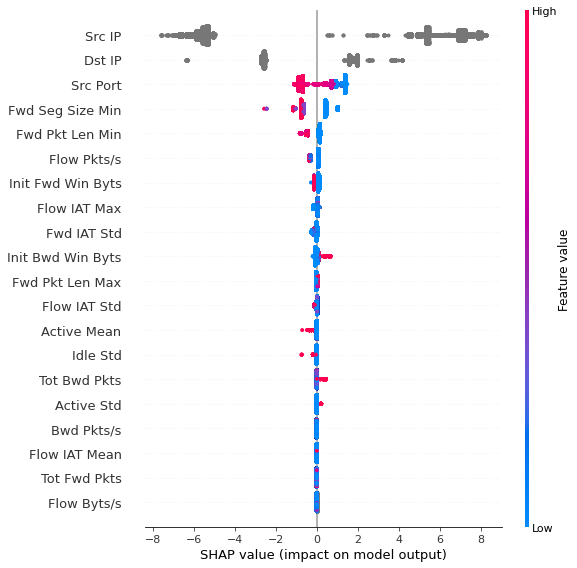

In [28]:
explainer = shap.TreeExplainer(cat_all_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

### With one categorial feature

In [29]:
X_not['Timestamp'] = X_not['Timestamp'].apply(toTimestamp)
X_not["Src IP"] = X_not["Src IP"].apply(iptodec)
X_not["Dst IP"] = X_not["Dst IP"].apply(iptodec)
X_not_d['Timestamp'] = X_not_d['Timestamp'].apply(toTimestamp)
X_not_d["Src IP"] = X_not_d["Src IP"].apply(iptodec)
X_not_d["Dst IP"] = X_not_d["Dst IP"].apply(iptodec)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_not, y, test_size=0.6, random_state=42)
train_data = Pool(X_train,y_train,cat_features=[0])
test_data = Pool(X_test,y_test,cat_features=[0])

In [31]:
cat_one_model = CatBoostClassifier(iterations=75,
                           depth=3,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           verbose=False)

In [32]:
cat_one_model.fit(train_data)

Метрики для малой тестовой выборки

In [33]:
roc_auc_score(y_test, cat_one_model.predict_proba(X_test)[:,1])

0.9999999928833785

In [34]:
accuracy_score(y_test, cat_one_model.predict(X_test))

0.9999545454545454

Метрики для большой тестовой выборки

In [35]:
roc_auc_score(y_d, cat_one_model.predict_proba(X_not_d)[:,1])

0.999999991175

In [36]:
accuracy_score(y_d, cat_one_model.predict(X_not_d))

0.999955

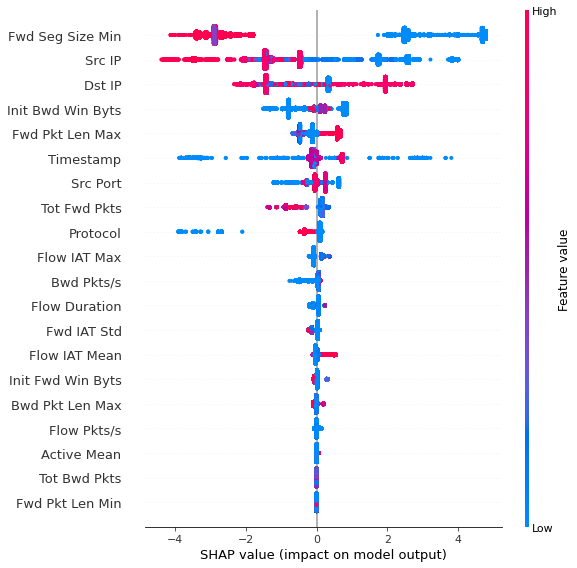

In [37]:
explainer = shap.TreeExplainer(cat_one_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## LGBM

In [38]:
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

### With all categorial feature

In [39]:
cat_feat=['Flow ID','Src IP','Dst IP','Timestamp']
for col in cat_feat:
            X[col] = X[col].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [40]:
train = lgb.Dataset(X_train,label=y_train,categorical_feature=cat_feat)
test = lgb.Dataset(X_test, label=y_test,reference=train,categorical_feature=cat_feat)

In [41]:
def set_parametrs():
    param_ = {}
    param_['boosting_type']='gbdt'
    param_['objective']='binary'
    param_['metric']='binary_logloss'
    param_['learning_rate']=0.1
    param_['num_threads'] = -1
    param_['max_depth'] = 3
    param_['verbose'] = -1
    param_['num_leaves'] = 32
    return param_

In [42]:
parametrs = set_parametrs()

In [43]:
lgbm_all_model=lgb.train(parametrs,train,75,valid_sets=test,verbose_eval=False)

Метрики для малой тестовой выборки

In [44]:
roc_auc_score(y_test, lgbm_all_model.predict(X_test))

0.9999998966942034

In [45]:
accuracy_score(y_test, lgbm_all_model.predict(X_test).round(0))

0.9999545454545454

Метрики для большой тестовой выборки

In [46]:
for col in cat_feat:
    X_d[col] = X_d[col].astype('category')

In [47]:
roc_auc_score(y_d, lgbm_all_model.predict(X_d))

0.99999990895

In [48]:
accuracy_score(y_d, lgbm_all_model.predict(X_d).round(0))

0.9999725

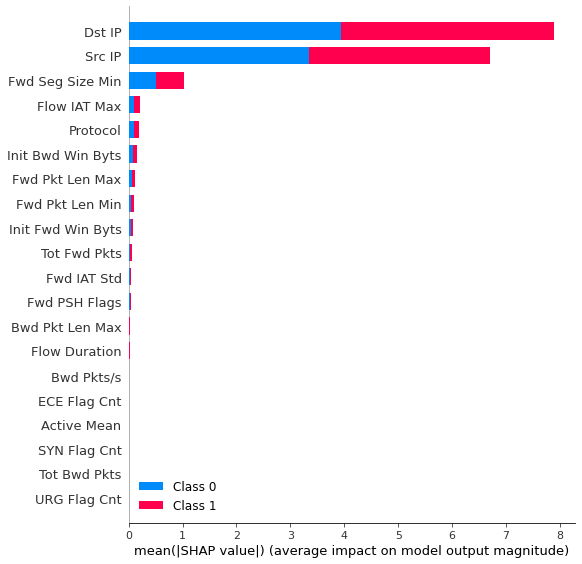

In [49]:
explainer = shap.TreeExplainer(lgbm_all_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

### With one categorial feature

In [50]:
cat_feat=['Flow ID']
for col in cat_feat:
            X_not[col] = X_not[col].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X_not, y, test_size=0.6, random_state=42)

In [51]:
train = lgb.Dataset(X_train,label=y_train,categorical_feature=cat_feat)
test = lgb.Dataset(X_test, label=y_test,reference=train,categorical_feature=cat_feat)

In [52]:
lgbm_one_model=lgb.train(parametrs,train,75,valid_sets=test,verbose_eval=False)

Метрики для малой тестовой выборки

In [53]:
roc_auc_score(y_test, lgbm_one_model.predict(X_test))

0.9999999995408632

In [54]:
accuracy_score(y_test, lgbm_one_model.predict(X_test).round(0))

0.9999848484848485

Метрики для большой тестовой выборки

In [55]:
for col in cat_feat:
    X_not_d[col] = X_not_d[col].astype('category')
roc_auc_score(y_d, lgbm_one_model.predict(X_not_d))

0.9999927525250002

In [56]:
accuracy_score(y_d, lgbm_one_model.predict(X_not_d).round(0))

0.9923275

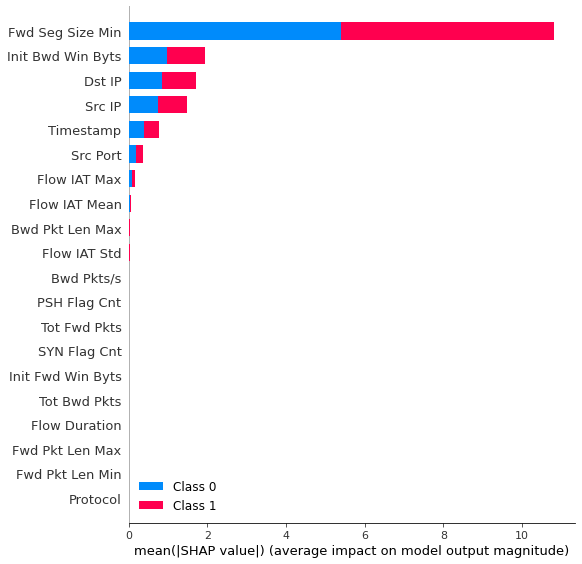

In [57]:
explainer = shap.TreeExplainer(lgbm_one_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)